In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov  7 03:51:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/My Drive/Tesina/data set 10-1"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Tesina/data set 10-1
/content/drive/My Drive/Tesina/data set 10-1


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import time

In [ ]:
x_Train = np.load('x_Train.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)
y_Train = np.load('y_Train.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)

x_Test = np.load('x_Test.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)
y_Test = np.load('y_Test.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)

x_Val = np.load('x_Val.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)
y_Val = np.load('y_Val.npy', mmap_mode=None, allow_pickle=True, fix_imports=False)
print(x_Train.shape)
print(y_Train.shape)


(2682, 12, 25600)
(2682,)


In [ ]:
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)

In [ ]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.SimpleRNN(units=64,input_shape=(x_Train.shape[1],x_Train.shape[2]),return_sequences=False))



#Decrease learning rate
# optimizer = keras.optimizers.Adam(learning_rate=0.001)
model1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# show model1 summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                3280960   
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3,281,025
Trainable params: 3,281,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(x_Train,y_Train,epochs=60, validation_data=(x_Val,y_Val),batch_size=32)

Epoch 1/60
42/42 [==============================] - 4s 42ms/step - loss: 0.6936 - accuracy: 0.4855 - val_loss: 0.6925 - val_accuracy: 0.5135
Epoch 2/60
42/42 [==============================] - 1s 34ms/step - loss: 0.6339 - accuracy: 0.6898 - val_loss: 0.7785 - val_accuracy: 0.4324
Epoch 3/60
42/42 [==============================] - 1s 34ms/step - loss: 0.4012 - accuracy: 0.7972 - val_loss: 0.9482 - val_accuracy: 0.5405
Epoch 4/60
42/42 [==============================] - 1s 34ms/step - loss: 0.1853 - accuracy: 0.9277 - val_loss: 1.6437 - val_accuracy: 0.5676
Epoch 5/60
42/42 [==============================] - 1s 36ms/step - loss: 0.0926 - accuracy: 0.9650 - val_loss: 1.9526 - val_accuracy: 0.6216
Epoch 6/60
42/42 [==============================] - 1s 34ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 1.7131 - val_accuracy: 0.5000
Epoch 7/60
42/42 [==============================] - 1s 34ms/step - loss: 0.0579 - accuracy: 0.9784 - val_loss: 2.0068 - val_accuracy: 0.5405
Epoch 8/60
42

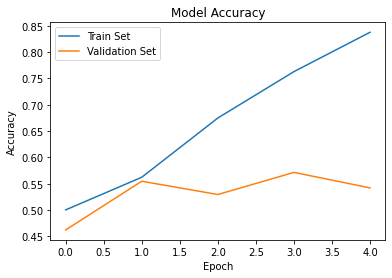

In [ ]:
plot.plot(model1.history.history['accuracy'])
plot.plot(model1.history.history['val_accuracy'])
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train Set', 'Validation Set'], loc='upper left')
plot.show()

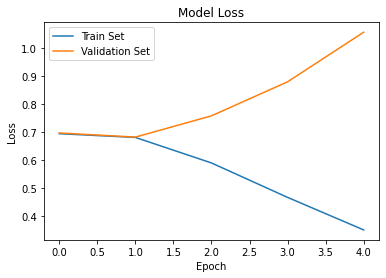

In [ ]:
plot.plot(model1.history.history['loss'])
plot.plot(model1.history.history['val_loss'])
plot.title('Model Loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train Set', 'Validation Set'], loc='upper left')
plot.show()

In [ ]:
print("Validation acc set at\t",model1.evaluate(x_Val,y_Val))
print("Test acc set at\t",model1.evaluate(x_Test,y_Test))
model1_predictions = model1.predict(x_Test)
print (model1_predictions)
np.unique((model1_predictions.round() == y_Test),return_counts=True)

5/5 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.4698
Validation acc set at	 [0.6931464076042175, 0.46979865431785583]
5/5 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5235
Test acc set at	 [0.6931388974189758, 0.5234899520874023]
[[0.4999652 ]
 [0.5002293 ]
 [0.49993384]
 [0.50007933]
 [0.50002205]
 [0.50010896]
 [0.49991715]
 [0.5000913 ]
 [0.49992752]
 [0.49999166]
 [0.5000273 ]
 [0.5000044 ]
 [0.49996173]
 [0.49994862]
 [0.49997544]
 [0.50005764]
 [0.5000481 ]
 [0.5000344 ]
 [0.49999094]
 [0.4999776 ]
 [0.49993837]
 [0.50007945]
 [0.50009054]
 [0.49999952]
 [0.5000029 ]
 [0.5000896 ]
 [0.50008714]
 [0.49996912]
 [0.5000604 ]
 [0.50011086]
 [0.49994397]
 [0.49996758]
 [0.49963704]
 [0.49999434]
 [0.50003046]
 [0.49991482]
 [0.50001884]
 [0.4999913 ]
 [0.4997823 ]
 [0.5000284 ]
 [0.50010365]
 [0.50013626]
 [0.5000041 ]
 [0.50008315]
 [0.50001043]
 [0.49999428]
 [0.50001484]
 [0.49999976]
 [0.49996674]
 [0.50004643]
 [0.5

(array([False,  True]), array([11111, 11090]))

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.SimpleRNN(units=32,input_shape=(x_Train.shape[1],x_Train.shape[2]),return_sequences=True))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.SimpleRNN(units=64))


model2.add(tf.keras.layers.Dense(units=32,activation='relu'))


model2.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) 
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy']) 

# show model2 summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 32)            820256    
                                                                 
 dropout (Dropout)           (None, 12, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 828,577
Trainable params: 828,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(x_Train,y_Train,epochs=60,batch_size=32,validation_data=(x_Val,y_Val))


Epoch 1/60
84/84 [==============================] - 7s 42ms/step - loss: 0.6935 - accuracy: 0.4944 - val_loss: 0.6932 - val_accuracy: 0.5101
Epoch 2/60
84/84 [==============================] - 3s 33ms/step - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6932 - val_accuracy: 0.5101
Epoch 3/60
84/84 [==============================] - 3s 35ms/step - loss: 0.6911 - accuracy: 0.5727 - val_loss: 0.6935 - val_accuracy: 0.4899
Epoch 4/60
84/84 [==============================] - 3s 32ms/step - loss: 0.6839 - accuracy: 0.6137 - val_loss: 0.6978 - val_accuracy: 0.4966
Epoch 5/60
84/84 [==============================] - 3s 34ms/step - loss: 0.6325 - accuracy: 0.6540 - val_loss: 0.7105 - val_accuracy: 0.5369
Epoch 6/60
84/84 [==============================] - 3s 33ms/step - loss: 0.5106 - accuracy: 0.7472 - val_loss: 0.8053 - val_accuracy: 0.5034
Epoch 7/60
84/84 [==============================] - 3s 34ms/step - loss: 0.3886 - accuracy: 0.8195 - val_loss: 0.9736 - val_accuracy: 0.5369
Epoch 8/60
84

KeyboardInterrupt: ignored

In [ ]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.SimpleRNN(units=64,input_shape=(x_Train.shape[1],x_Train.shape[2]),return_sequences=True))

model3.add(tf.keras.layers.SimpleRNN(units=64,recurrent_dropout=0.2)) 
model3.add(tf.keras.layers.Dense(units=64,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))


optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])


model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 12, 64)            1642560   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,655,041
Trainable params: 1,655,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(x_Train,y_Train,epochs=100,batch_size=64,validation_data=(x_Val,y_Val), callbacks=callback)

Epoch 1/100
42/42 [==============================] - 4s 63ms/step - loss: 0.6933 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5101
Epoch 2/100
42/42 [==============================] - 2s 49ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4765
Epoch 3/100
42/42 [==============================] - 2s 49ms/step - loss: 0.6928 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 4/100
42/42 [==============================] - 2s 49ms/step - loss: 0.6931 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 5/100
42/42 [==============================] - 2s 49ms/step - loss: 0.6921 - accuracy: 0.5254 - val_loss: 0.6932 - val_accuracy: 0.5101
Epoch 6/100
42/42 [==============================] - 2s 49ms/step - loss: 0.6927 - accuracy: 0.5045 - val_loss: 0.6933 - val_accuracy: 0.4832
Epoch 7/100
42/42 [==============================] - 2s 48ms/step - loss: 0.6916 - accuracy: 0.5354 - val_loss: 0.6930 - val_accuracy: 0.5101
Epoch 

KeyboardInterrupt: ignored

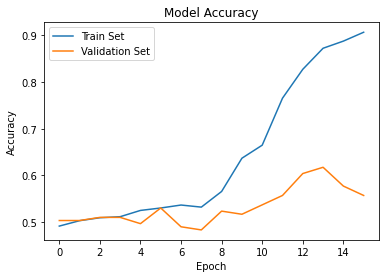

In [ ]:
    plot.plot(model3.history.history['accuracy'])
plot.plot(model3.history.history['val_accuracy'])
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train Set', 'Validation Set'], loc='upper left')
plot.show()

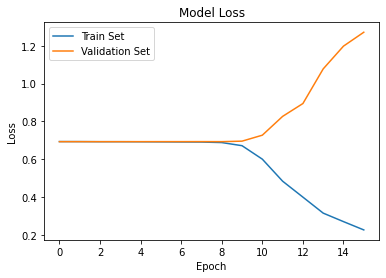

In [ ]:
plot.plot(model3.history.history['loss'])
plot.plot(model3.history.history['val_loss'])
plot.title('Model Loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train Set', 'Validation Set'], loc='upper left')
plot.show()

In [ ]:
print("Validation acc set at\t",model3.evaluate(x_Val,y_Val))
# print("Test acc set at\t",model1.evaluate(x_Test,y_Test))
print(x_Test.shape)
model3_predictions = model3.predict(x_Test[1:2,:,:])

print(model3_predictions.round())
print(y_Test[2])
np.unique((model3_predictions.round() == y_Test),return_counts=True)
# print((model3_predictions.round() == y_Test).shape)

5/5 [==============================] - 0s 13ms/step - loss: 1.5333 - accuracy: 0.5839
Validation acc set at	 [1.533342957496643, 0.5838926434516907]
(149, 12, 25600)
[[1.]]
0


(array([False,  True]), array([73, 76]))

In [ ]:
x_Test[1:2].shape

(1, 12, 25600)

In [ ]:
(y_Train == 1).sum()


674

In [ ]:
y_Train.shape

(1341,)

In [ ]:
model4 = tf.keras.models.Sequential()

model4.add(tf.keras.layers.LSTM(units=64,input_shape=(x_Train.shape[1],x_Train.shape[2]),return_sequences=False))


#Decrease learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model4.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# show model1 summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                6570240   
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,570,305
Trainable params: 6,570,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.fit(x_Train,y_Train,epochs=60,batch_size=64,validation_data=(x_Val,y_Val))

In [ ]:
model5 = tf.keras.models.Sequential()

model5.add(tf.keras.layers.GRU(units=64,input_shape=(x_Train.shape[1],x_Train.shape[2]),return_sequences=False))


#Decrease learning rate
# optimizer = keras.optimizers.Adam(learning_rate=0.001)
model5.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# show model1 summary
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                4927872   
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,927,937
Trainable params: 4,927,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.fit(x_Train,y_Train,epochs=60,batch_size=64,validation_data=(x_Val,y_Val))

Epoch 1/60
42/42 [==============================] - 8s 51ms/step - loss: 0.6936 - accuracy: 0.4825 - val_loss: 0.6932 - val_accuracy: 0.4899
Epoch 2/60
42/42 [==============================] - 1s 36ms/step - loss: 0.6931 - accuracy: 0.4870 - val_loss: 0.6930 - val_accuracy: 0.5101
Epoch 3/60
42/42 [==============================] - 2s 37ms/step - loss: 0.6929 - accuracy: 0.5179 - val_loss: 0.6931 - val_accuracy: 0.5168
Epoch 4/60
42/42 [==============================] - 2s 37ms/step - loss: 0.6924 - accuracy: 0.5265 - val_loss: 0.6931 - val_accuracy: 0.5101
Epoch 5/60
42/42 [==============================] - 2s 36ms/step - loss: 0.6917 - accuracy: 0.5466 - val_loss: 0.6931 - val_accuracy: 0.5168
Epoch 6/60
42/42 [==============================] - 2s 37ms/step - loss: 0.6908 - accuracy: 0.5466 - val_loss: 0.6936 - val_accuracy: 0.5101
Epoch 7/60
42/42 [==============================] - 2s 36ms/step - loss: 0.6887 - accuracy: 0.5298 - val_loss: 0.6917 - val_accuracy: 0.5101
Epoch 8/60
42

KeyboardInterrupt: ignored